Churn Prediction Using Machine learning - By Nassim Benhammadi

Let's start by loading the requiered libraries and loading data from the file.

In [2]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_curve

%matplotlib inline 

DF = pd.read_csv(r'C:\kaggle\Churn\Churn.csv')

In [4]:
DF.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [3]:
df = pd.get_dummies(DF,columns=['State','Area Code'])

Account Length
VMail Message
Day Mins
Eve Mins
Night Mins
Intl Mins
CustServ Calls
Churn
Int'l Plan
VMail Plan
Day Calls
Day Charge
Eve Calls
Eve Charge
Night Calls
Night Charge
Intl Calls
Intl Charge
Phone


TypeError: len() of unsized object

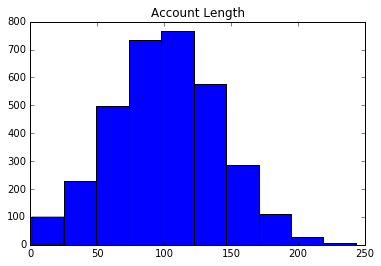

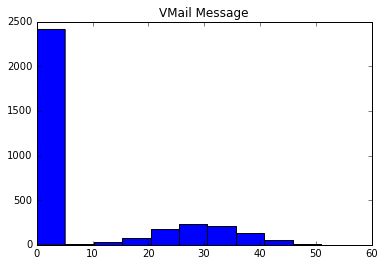

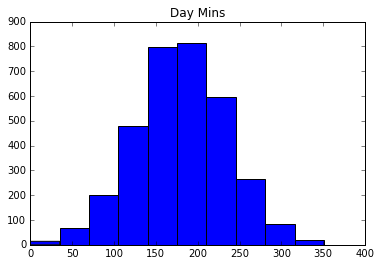

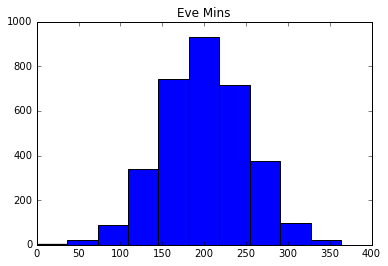

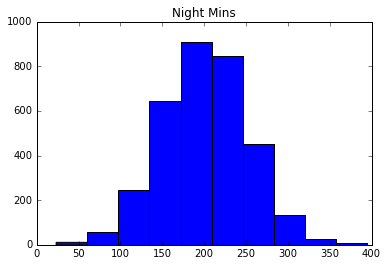

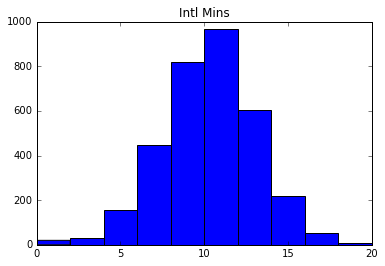

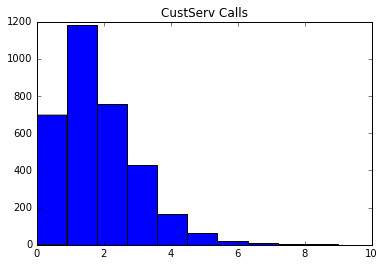

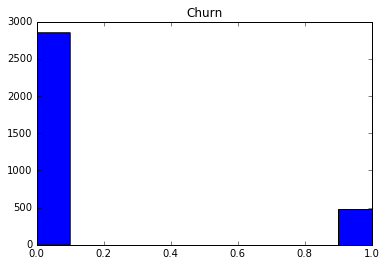

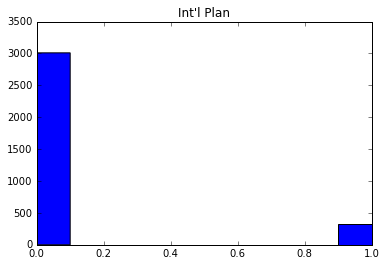

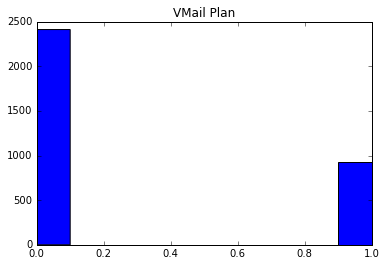

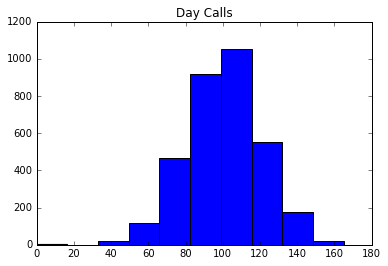

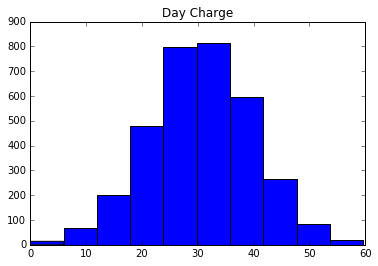

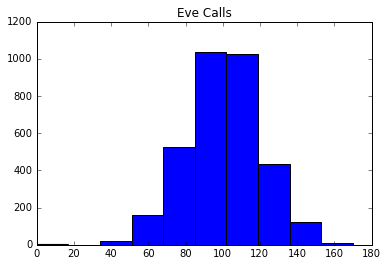

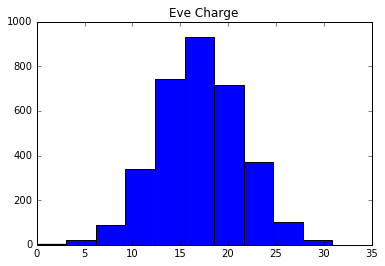

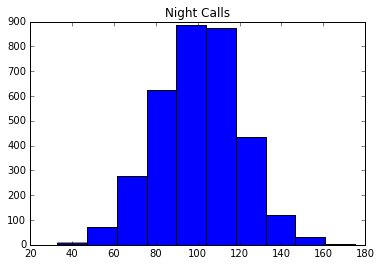

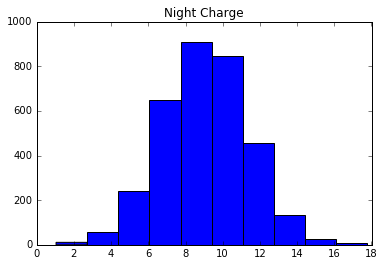

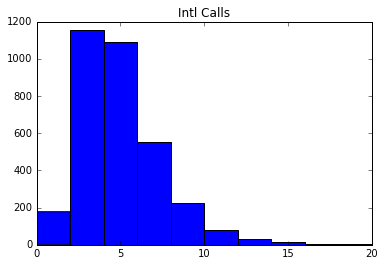

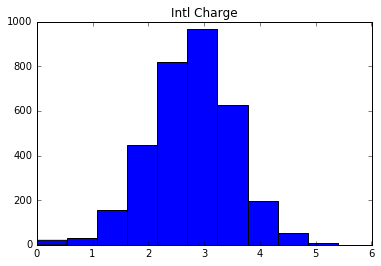

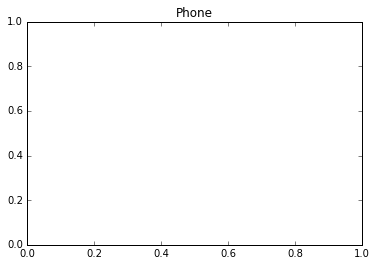

In [4]:
for F in list(df.columns) :
    print (F)
    plt.figure()
    plt.title(F)
    plt.hist(df[F])

In [5]:
df = df.drop('Phone',axis=1)

In [6]:
df=df.drop(['VMail Message','VMail Plan'],axis=1)

In [7]:
df_train = df.drop('Churn',axis=1)
df_test = df['Churn']

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(df_train,df_test,test_size=0.2,random_state=18)

In [9]:
Model1 = linear_model.LogisticRegression(C=1e5,)
Model1.fit(train_X,train_Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
cunrn_predict = Model1.predict(test_X)

In [11]:
target_names = ['No_Churn', 'Churn']
print(classification_report(test_Y, cunrn_predict, target_names=target_names))


             precision    recall  f1-score   support

   No_Churn       0.88      0.97      0.93       574
      Churn       0.56      0.22      0.31        93

avg / total       0.84      0.87      0.84       667



In [12]:
target_names = ['No_Churn', 'Churn']
print(confusion_matrix(test_Y, cunrn_predict))

[[558  16]
 [ 73  20]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
Model2 = RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=2,random_state=18)
Model2.fit(train_X,train_Y)
cunrn_predict = Model2.predict(test_X)
prob_pred = Model2.predict_proba(test_X)
pd.DataFrame({'prob':prob_pred[250:350,1],'true':test_Y[250:350],'pred':cunrn_predict[250:350]})

print(confusion_matrix(test_Y, cunrn_predict))

print(classification_report(test_Y, cunrn_predict, target_names=target_names))

[[566   8]
 [ 48  45]]
             precision    recall  f1-score   support

   No_Churn       0.92      0.99      0.95       574
      Churn       0.85      0.48      0.62        93

avg / total       0.91      0.92      0.91       667



In [14]:
print(roc_auc_score(test_Y, prob_pred[:,1]))

0.906176239182


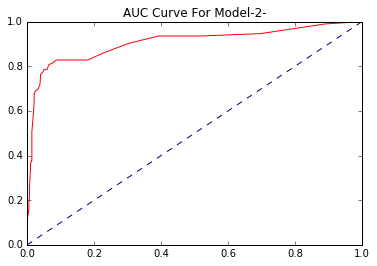

In [15]:
fpr,tpr,threshold = roc_curve(test_Y,prob_pred[:,1])

plt.plot(fpr,tpr, color ='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("AUC Curve For Model-2-")

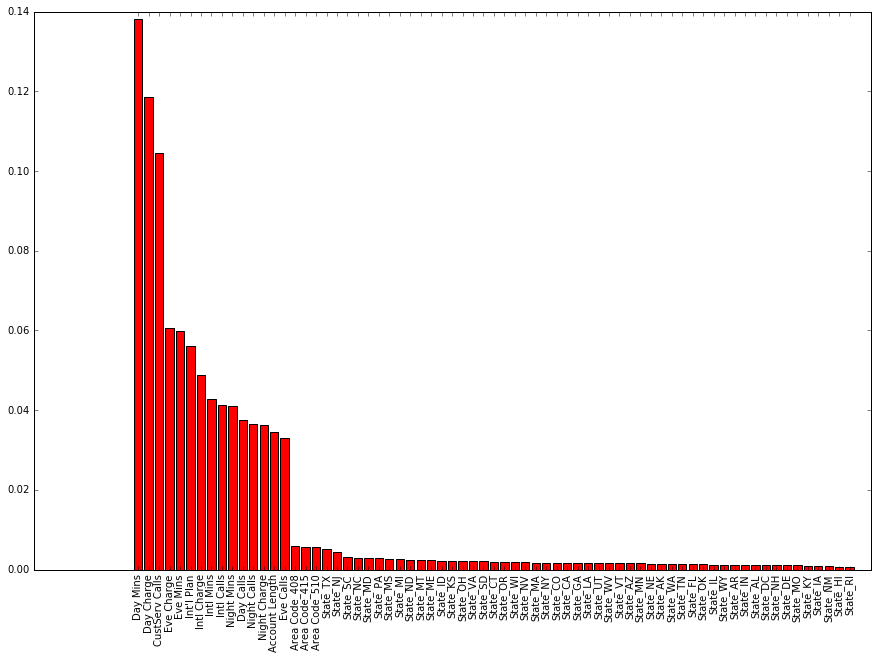

In [44]:
importances = Model2.feature_importances_
indices = np.argsort(importances)[::-1]
# train_X.columns[indices]
plt.figure(figsize=(15,10))
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_X.shape[1]),train_X.columns[indices],rotation="vertical")
plt.show()

[[563  11]
 [ 33  60]]
             precision    recall  f1-score   support

   No_Churn       0.94      0.98      0.96       574
      Churn       0.85      0.65      0.73        93

avg / total       0.93      0.93      0.93       667

0.900827994455


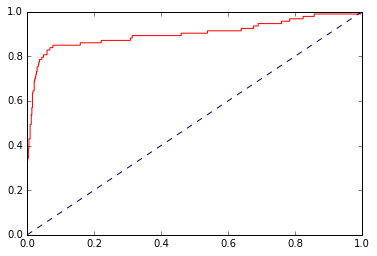

In [46]:
Used_Features = ['Day Mins','Day Charge','CustServ Calls','Eve Mins', 'Eve Charge',
       "Int'l Plan", 'Intl Charge', 'Intl Mins', 'Intl Calls', 'Night Mins',
       'Day Calls', 'Night Charge', 'Night Calls', 'Account Length',
       'Eve Calls']
train1_X,test1_X = train_X[Used_Features],test_X[Used_Features]
Model2 = RandomForestClassifier(n_estimators=100,random_state=18,min_samples_split= 3, max_depth= None, min_samples_leaf= 6, bootstrap= True, max_features= 7, criterion= 'entropy')
Model2.fit(train1_X,train_Y)
churn_predict = Model2.predict(test1_X)
print(confusion_matrix(test_Y, churn_predict))
print(classification_report(test_Y, churn_predict, target_names=target_names))
prob_pred = Model2.predict_proba(test1_X)
print(roc_auc_score(test_Y, prob_pred[:,1]))
fpr,tpr,threshold = roc_curve(test_Y,prob_pred[:,1])
plt.plot(fpr,tpr, color ='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [174]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
Used_Features = ['Day Mins','Day Charge','CustServ Calls','Eve Mins', 'Eve Charge',
       "Int'l Plan", 'Intl Charge', 'Intl Mins', 'Intl Calls', 'Night Mins',
       'Day Calls', 'Night Charge', 'Night Calls', 'Account Length',
       'Eve Calls', 'VMail Message', 'VMail Plan']
train1_X,test1_X = train_X[Used_Features],test_X[Used_Features]
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
Model2 = RandomForestClassifier(n_estimators=100,random_state=18,'min_samples_split': 9, 'max_depth': None, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 7, 'criterion': 'entropy')
n_iter_search = 20
random_search = RandomizedSearchCV(Model2, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring="f1")
random_search.fit(train1_X,train_Y)
print(random_search.cv_results_)


C:\Users\nassim.benhammadi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nassim.benhammadi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nassim.benhammadi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nassim.benhammadi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samp

{'std_score_time': array([  4.89881910e-03,   8.16525002e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.71482745e-04,
         4.49700425e-02,   4.71415310e-03,   5.88808872e-03,
         0.00000000e+00,   4.71415310e-03,   1.12391596e-07,
         4.71482745e-04,   4.71409691e-03,   4.71415310e-03,
         4.71415310e-03,   5.18552346e-03,   1.12391596e-07,
         4.24267036e-03,   0.00000000e+00]), 'param_max_depth': masked_array(data = [None None None 3 3 3 3 3 3 3 3 3 None None 3 3 None None 3 None],
             mask = [False False False False False False False False False False False False
 False False False False False False False False],
       fill_value = ?)
, 'mean_train_score': array([ 0.83498646,  0.86222034,  0.88562193,  0.57419292,  0.52641377,
        0.56682884,  0.        ,  0.30597543,  0.38917935,  0.6055185 ,
        0.02780658,  0.61535196,  0.8880185 ,  0.88889397,  0.62129108,
        0.48526202,  0.75545553,  0.54153138,  0.00510856, 

C:\Users\nassim.benhammadi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
